# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [4]:
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)
data_source='yahoo'

In [5]:
BAC = data.DataReader("BAC", data_source=data_source, start=start, end=end)
# Bank of America Corp

BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584076
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227398
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270214
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220264
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241657


In [35]:
CG = data.DataReader("C", data_source=data_source, start=start, end=end)
# CitiGroup

CG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,358.130768
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,351.518799
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,353.262543
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,353.262543
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,351.591522


In [7]:
GS = data.DataReader("GS", data_source=data_source, start=start, end=end)
# Goldman Sachs

GS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,102.626816
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,101.209290
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,101.169502
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,102.602966
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,103.837303


In [8]:
JPM = data.DataReader("JPM", data_source=data_source, start=start, end=end)
# JPMorgan Chase

JPM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,25.922327
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,25.772717
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,25.850780
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,26.032921
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,26.455736


In [9]:
WFC = data.DataReader("WFC", data_source, start, end)
# Wells Fargo

WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.104448
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,19.871265
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,19.849213
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,19.965807
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,19.962656


In [10]:
MS = data.DataReader("MS", data_source, start, end)
# Morgan Stanley

MS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,35.224957
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,35.249126
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,35.345791
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,35.382030
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,35.756573


Creating a list of the ticker symbols (as strings) in alphabetical order:

In [36]:
tickers = ["BAC", "CG", "GS", "JPM", "WFC", "MS"]

We're concatenating the bank dataframes together using pd.concat.

In [37]:
bank_stocks = pd.concat([BAC, CG, GS, JPM, MS, WFC], axis=1, keys=tickers)

bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584076   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227398   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270214   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220264   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241657   

                    CG                                      ...        WFC  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                    MS                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.224957  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.249126  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.345791  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.382030  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.756573  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.104448  
2006-01-04  31.530001  10870000.0  19.871265  
2006-01-05  31.495001  10158000.0  19.849213  
2006-01-06  31.680000   8403800.0  19.965807  
2006-01-09  31.674999   5619600.0  19.962656  

[5 rows x 36 columns]

In [40]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# EDA

Let's explore the data a bit.

In [41]:
# Max close price throughout the entire time period.
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
CG     564.099976
GS     247.919998
JPM     70.080002
WFC     89.300003
MS      58.520000
dtype: float64

We're creating a new dataframe called 'returns'. This dataframe will contain the returns for each bank's stock.

In [42]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [43]:
returns

,BAC Return,CG Return,GS Return,JPM Return,WFC Return,MS Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


Now let's start some visualization.

The first one will be a pairplot of the returns dataframe.

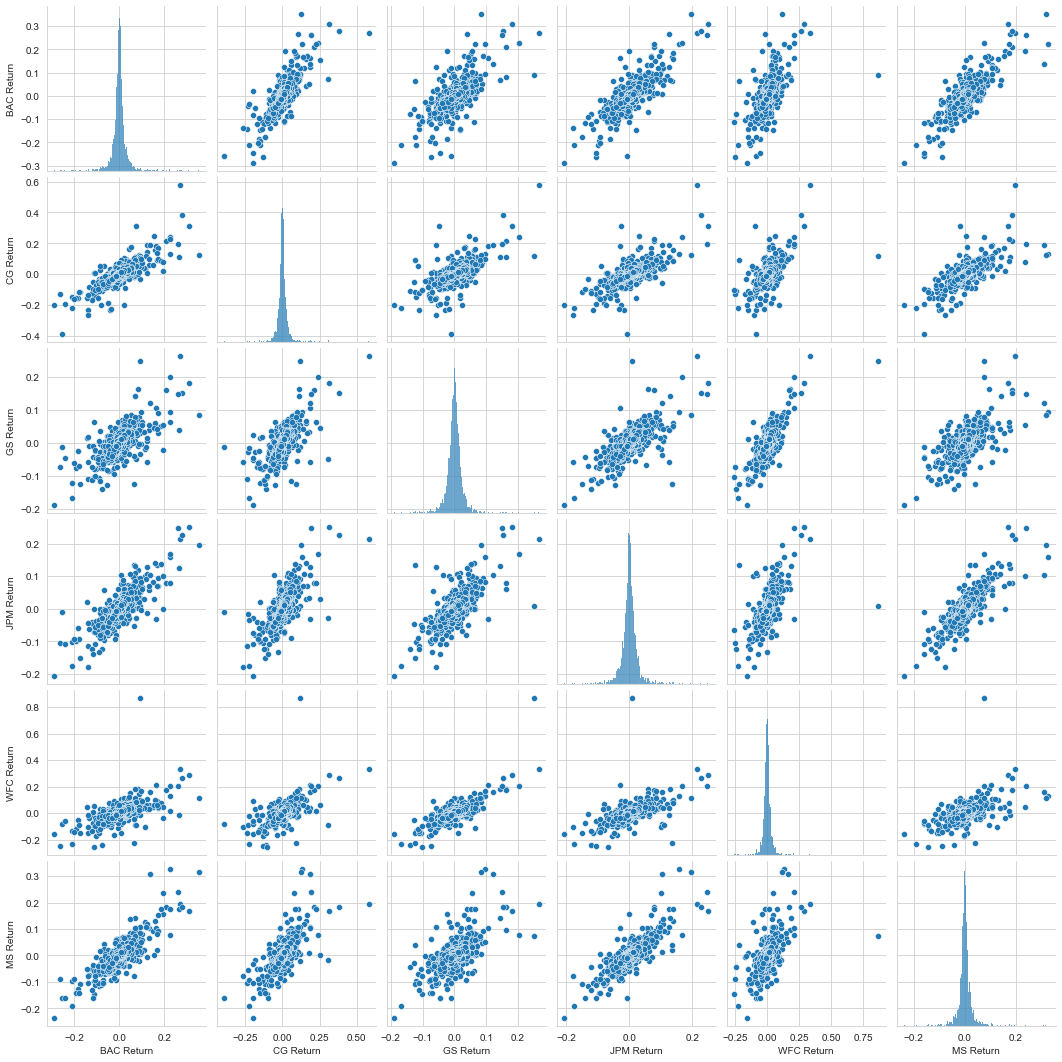

In [44]:
sns.pairplot(returns[1:])

CitiGroup had a huge stock crash.

If we check 'returns' DataFrame, we can see on what dates each bank stock had the best and worst single day returns. Also, we can notice that 4 of the banks share the same day for the worst drop.

In [45]:
returns.idxmin()

BAC Return   2009-01-20
CG Return    2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
WFC Return   2008-10-09
MS Return    2009-01-20
dtype: datetime64[ns]

After doing some Google Search, we could notice that this was Barack Obama's inauguration date. This may be due to some market investors get panicky when some big political change happens.

In [46]:
returns.idxmax()

BAC Return   2009-04-09
CG Return    2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
WFC Return   2008-10-13
MS Return    2008-07-16
dtype: datetime64[ns]

You should have noticed that Citigroup's largest drop and biggest gain were very close to one another.

After more Google Search, we get news that tell us CitiGroup announces a reverse stock split and that's essentially what happened that day.

Let's continue on the exploration. We want to take a look at the standard deviation of the returns DataFrame and see which stock we can classify as the riskiest over the entire time period and for the year 2015.

In [47]:
returns.std()

BAC Return    0.036647
CG Return     0.038672
GS Return     0.025390
JPM Return    0.027667
WFC Return    0.037819
MS Return     0.030238
dtype: float64

In [21]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
WFC Return    0.016249
MS Return     0.012591
dtype: float64

Next we want to create a plot using seaborn of the 2015 returns for Morgan Stanley.

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

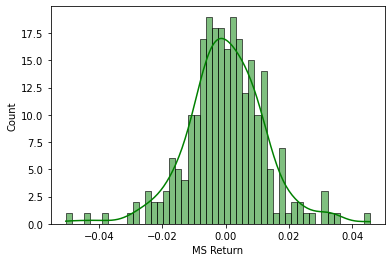

In [22]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',
            bins=50, kde=True)

So we can that the distribution is pretty stable. The X Axis represents the percent of returns and it only deviates about 0.6 from the average.

Let's do another plot, this time a distplot using seaborn of the 2008 returns for CitiGroup.

<AxesSubplot:xlabel='C Return', ylabel='Count'>

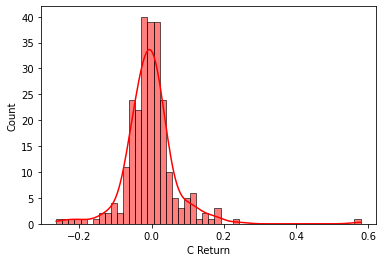

In [23]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',
            bins=50, kde=True)

If we compare the two plots we will notice that the standard deviation is quite a bit more stretched out on the CitiGroup.

____
# More Visualization

Let's start creating a line plot showing Close price for each bank for the entire index of time.

<AxesSubplot:xlabel='Date'>

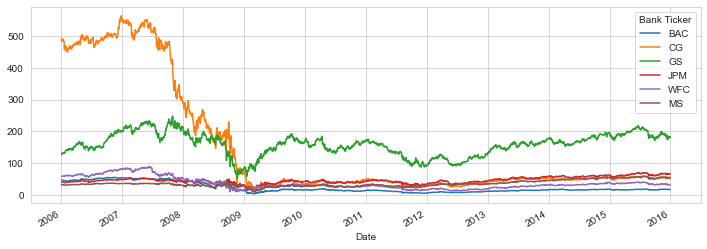

In [53]:
bank_stocks.xs(key='Close', axis=1,level='Stock Info').plot(figsize=(12,4))

Here it's clear CitiGroup (orange line) had a huge crash in 2008.

In [52]:
bank_stocks.xs(key='Close', axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

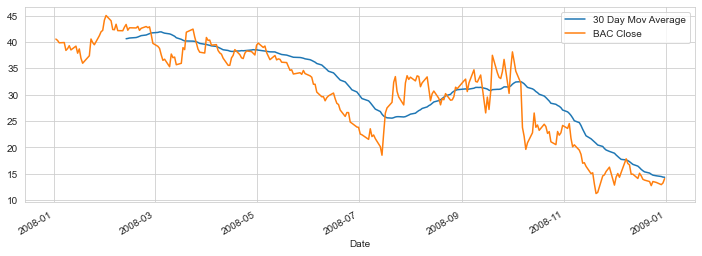

In [27]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label='30 Day Mov Average')
BAC['Close'].loc['2008-01-01': '2009-01-01'].plot(label='BAC Close')
plt.legend()

Creating a heatmap of the correlation between the stocks Close Price.

In [57]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

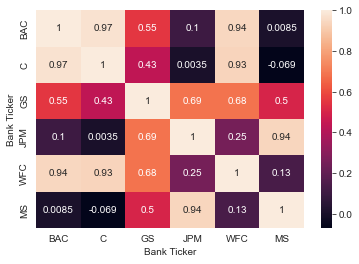

In [29]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)


Let's use seaborn to cluster these correlations together and maybe make it a litte more clear as to what's happening.

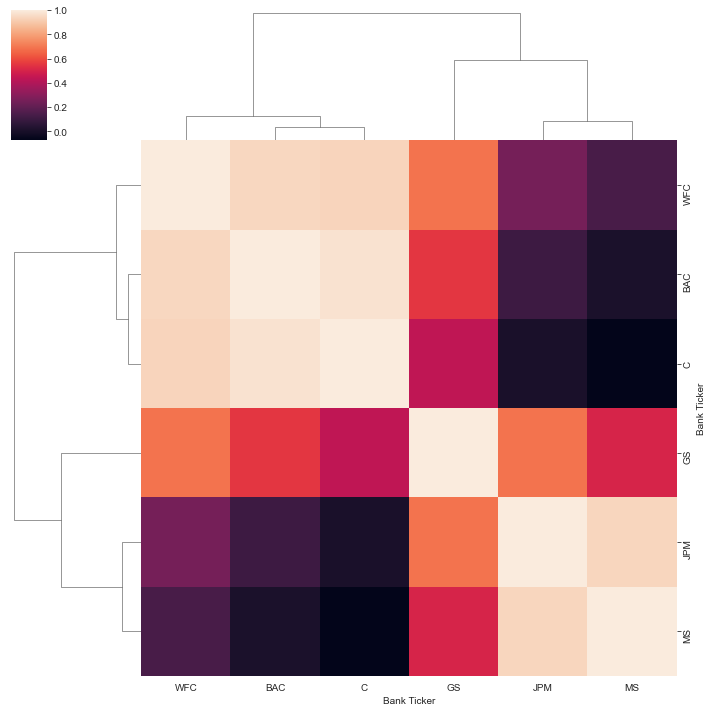

In [30]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr())